# Parts 5 and 6: grouping and visualising data

This workbook will require the ``titanic`` and ``C19_portsmouth`` datasets. You will need to open these as ``pandas`` dataframes. Remember to import the ``numpy`` and ``pandas`` datasets.


In [3]:
# Use this cell to import numpy and pandas
import numpy as np
import pandas as pd

In [4]:
# Use this cell to import the titanic dataset. We'll import the C19 dataset later.
df_titanic = pd.read_excel("titanic.xlsx")

## Grouping data

We may want to split the data into groups bases on some criteria or apply a function to each group independently.

Let's demonstrate this on a example:

In [6]:
df_titanic.groupby("Sex").sum(numeric_only=True)

,PassengerId,Age,Fare,Survived
Sex,,,,
female,135343,7286.00,13966.6628,233
male,262043,13919.17,14727.2865,109


This created a new data frame, so that the gender of a passenger is its index.
This is very informative, in particular, in finding up how many people survived as a function of gender.

### Exercise 5.1

Use grouping by gender to find out the average age and average fare as a function of gender.

### Exercise 5.2

Using grouping by to split the data into the ones who survived and did not survive the titanic sinking. Find the average Age and Fare as a function of whether or not the passenger survived.

## Part 6: Visualisation of DataFrames

Pandas Data Frames are equipped with plotting functions from the ``matplotlib`` library. Let us demonstrate a few examples:

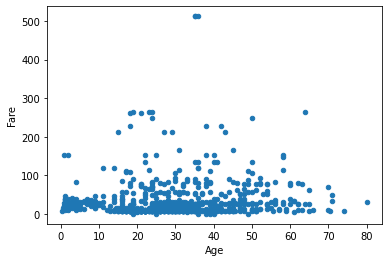

In [ ]:
df_titanic.plot(kind="scatter", x="Age", y="Fare")

Note that it works ever though we have not imported matplotlib (pandas will itself import matplotlib).
However, let us demonstrate how to eliminate the ``<matplotlib.axes...>`` text without ``plt.show()`` and without importing ``matplotlib.pyplot``.

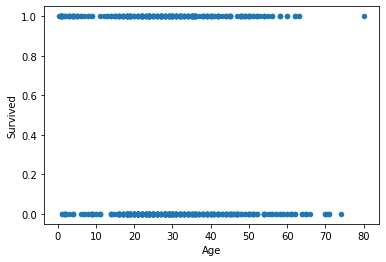

In [ ]:
df_titanic.plot(kind="scatter", x="Age", y="Survived");

The semi-colon ``;`` does the job.

How about line plots:

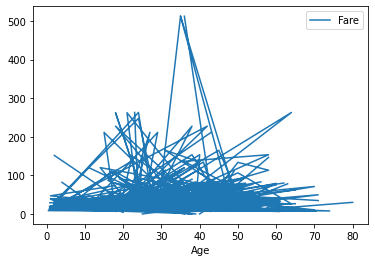

In [ ]:
df_titanic.plot(kind="line", x="Age", y="Fare");

This looks very messy, it would require some sorting of the Age column

In [ ]:
df_titanic_sorted_age = df_titanic.sort_values(by=["Age"])

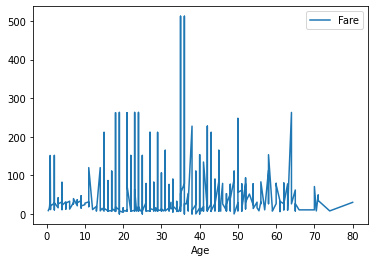

In [ ]:
df_titanic_sorted_age.plot(kind="line", x="Age", y="Fare");

This looks a bit better, but really we should take the mean fare for each age.

In [7]:
df_titanic_age_group = df_titanic.groupby("Age", as_index=False).mean(numeric_only=True)
df_titanic_age_group.head(10)

,Age,PassengerId,Fare,Survived
0,0.42,804.000000,8.516700,1.000000
1,0.67,756.000000,14.500000,1.000000
2,0.75,557.500000,19.258300,1.000000
3,0.83,455.500000,23.875000,1.000000
4,0.92,306.000000,151.550000,1.000000
5,1.00,415.428571,30.005957,0.714286
6,2.00,346.900000,37.536250,0.300000
7,3.00,272.000000,25.781950,0.833333
8,4.00,466.100000,29.543330,0.700000
9,5.00,380.000000,22.717700,1.000000


Note that ``as_index=False`` did not make `Age` an index of the above DataFrame.

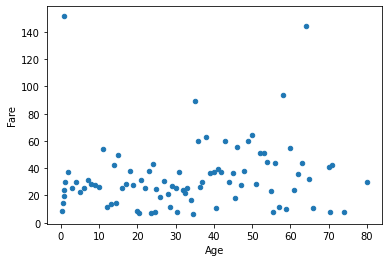

In [ ]:
df_titanic_age_group.plot(kind="scatter", x="Age", y="Fare");

### Exercise 6.1

Group your ``df_titanic`` by ``Age`` and get the mean.
Then plot a scatter plot that demonstrates the relation between Age and Survived. Can you make any conclusions from the plot?


### Exercise 6.2
Group your ``df_titanic`` by Fare and get the mean. Then plot a scatter plot that demonstrated the relation between Fare and Survived. Can you make any conslusions from the plot?

### Exercise 6.3
Group your ``df_titanic`` by Sex and get the mean. Then plot a scatter plot that demonstrated the relation between Sex and Survived. Can you make any conslusions from the plot? Yes, the plot should contain only two points.

### How about histograms?

Histograms of a single column can be obtained via:

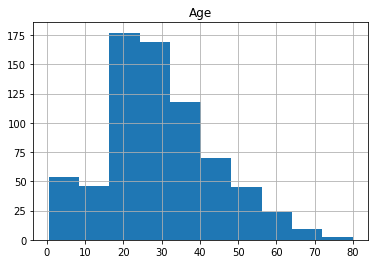

In [ ]:
df_titanic_sorted_age.hist(column="Age");

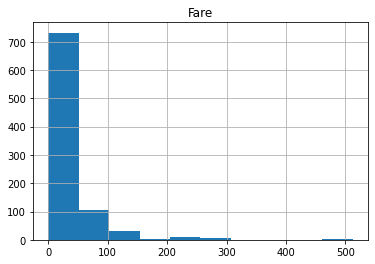

In [ ]:
df_titanic_sorted_age.hist(column="Fare", bins=10);

If we wish to seperate the histograms by groups, e.g., by Survived, to have two histograms for the ones who survived, and the ones who did not, we use:

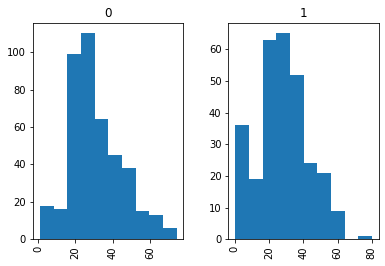

In [ ]:
df_titanic_sorted_age.hist(column="Age", by="Survived");

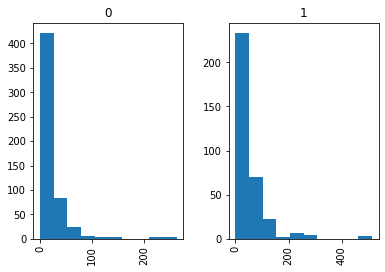

In [ ]:
df_titanic_sorted_age.hist(column="Fare", by="Survived");

### Exercise 6.4

Plot the histograms of

a) Survived

b) Fare

they should be separated into groups by gender.

## 6.1 Plotting time series.

You may want to visualise how some quantity was changing its value in time. For example this could be the price of some stock, or the accumulated number of Covid-19 infections. For that we can use pandas Series (recall that the columns of Pandas Data Frames are Series).

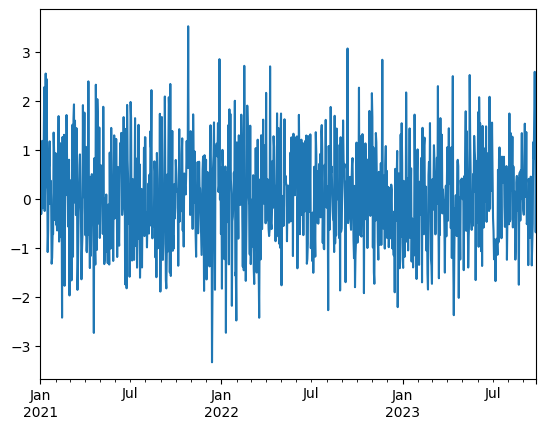

In [9]:
num_of_random = 1000
random_values = np.random.normal(size=num_of_random) # a sample of 1000 from standard normal distribution
date_range = pd.date_range("1/1/2021", periods = num_of_random) # 1000 days starting from Jan 2021
time_series = pd.Series(random_values, index = date_range) # Creating a pd.Series
time_series.plot();

This looks very noisy, cannot get any information out of it.
We need to look at this through the cumulative sums, then we will be able to see how the value has been changing from one to the other. This will look much more informative, but still a bit noisy.

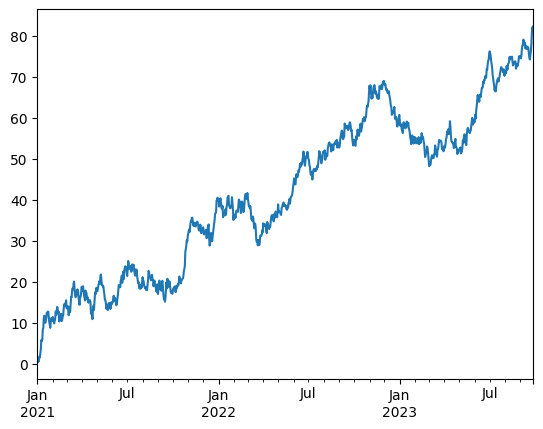

In [10]:
time_series = time_series.cumsum()
time_series.plot();

In [11]:
mySeries = pd.Series([1, 2, 3, 4, 5])
print(mySeries.cumsum())

0     1
1     3
2     6
3    10
4    15
dtype: int64


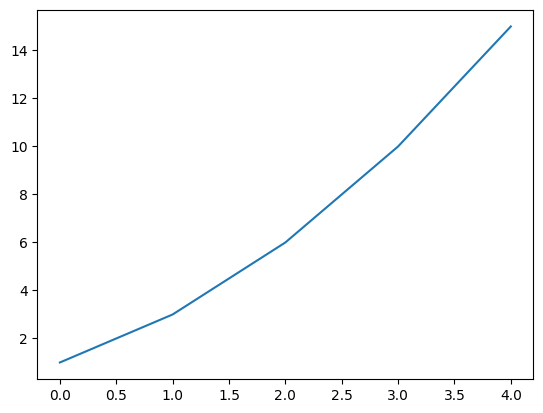

In [12]:
mySeries.cumsum().plot();

Given the numerical data
$$ [x_1, x_2, x_3, \ldots, x_n]$$
The cumulative sum is
$$ [x_1, x_1 + x_2, x_1 + x_2 + x_3, \ldots, x_1 + x_2 + x_3 + \cdots + x_n]$$

### Exercise 6.1.1

Researchers working for the Institute of Cosmology and Gravitation and the School of Maths and Phyics worked with Track and Trace teams in the University between 2020-21 to investigate covid spread in the staff and student population and help identify transmission vectors.

Import ``C19_portsmouth.xlsx`` into a pandas Data Frame. This is a spreadsheet that shows the number of new Covid-19 cases that were published by date.
Display the header of this spreadsheet.


Sort it by data from the oldest to newest, and assign this sorted data frame to a new variable.

Use ``sort_values()`` function applied to a data frame.

Add a new column to the sorted covid cases data frame which represents the cumulative sum of new cases.

Plot the line plot of cumulative cases so that the x-axis is the date.
Note that the function is increasing (as you add positive values to each other. If the infection slows down the function will have less steep slope, if we get more and more infection the slope will be very steep.

In the cell below plot the line plot of the ``newCasesByPublishDate`` so that the $x$-axis is the date. This plot will look noisy, but you will be able to see particular days with spikes of infections.